creation of DenseNet but with modification to simplify the architecture. The core concept remains concatination of layers unlike Resnets where residuals are added. 

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(128, 3,strides=1, activation='relu',padding='same')(inputs)
x = layers.MaxPool2D(pool_size=(3,3),strides=1)(x)   ### DIIFER


############1st Block##########
x11=layers.Conv2D(128,1,activation='relu')(x)
x11= layers.Conv2D(64,3,activation='relu',padding='same')(x11)
x11 = layers.BatchNormalization()(x11)

x12=layers.Conv2D(128,1,activation='relu')(x11)
x12= layers.Conv2D(64,3,activation='relu',padding='same')(x12)
x12 = layers.concatenate([x12, x11])
x12 = layers.BatchNormalization()(x12)

x13=layers.Conv2D(128,1,activation='relu')(x12)
x13= layers.Conv2D(64,3,activation='relu',padding='same')(x13)

#####################Transition##############################

trans1=layers.Conv2D(128,1,activation='relu')(x13)
trans1 = layers.AveragePooling2D(pool_size=(2,2),strides=2)(trans1)

#############################

#########2nd Block#############
x21=layers.Conv2D(128,1,activation='relu')(trans1)
x21= layers.Conv2D(64,3,activation='relu',padding='same')(x21)
x21 = layers.BatchNormalization()(x21)

x22=layers.Conv2D(128,1,activation='relu')(x21)
x22= layers.Conv2D(64,3,activation='relu',padding='same')(x22)
x22 = layers.concatenate([x22, x21])
x22 = layers.BatchNormalization()(x22)

x23=layers.Conv2D(128,1,activation='relu')(x22)
x23= layers.Conv2D(64,3,activation='relu',padding='same')(x23)
#####################Transition##############################
trans2=layers.Conv2D(128,1,activation='relu')(x23)
trans2 = layers.AveragePooling2D(pool_size=(2,2),strides=2)(trans2)

#############################

#########3nd Block#############
x31=layers.Conv2D(128,1,activation='relu')(trans2)
x31= layers.Conv2D(64,3,activation='relu',padding='same')(x31)
x31 = layers.BatchNormalization()(x31)

x32=layers.Conv2D(128,1,activation='relu')(x31)
x32= layers.Conv2D(64,3,activation='relu',padding='same')(x32)
x32 = layers.concatenate([x32, x31])
x32 = layers.BatchNormalization()(x32)

x33=layers.Conv2D(128,1,activation='relu')(x32)
x33= layers.Conv2D(32,3,activation='relu',padding='same')(x33)
#####################Transition##############################

trans3 = layers.AveragePooling2D(pool_size=(3,3),strides=2)(x33)
outputs = layers.Flatten()(x33)
#outputs = layers.Dense(256, activation='relu')(trans3)

outputs1 = layers.Dense(10, activation='softmax')(outputs)

model = keras.Model(inputs, outputs1, name='densenet')
model.summary()


Model: "densenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 128)  3584        img[0][0]                        
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 128)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 128)  16512       max_pooling2d[0][0]              
___________________________________________________________________________________________

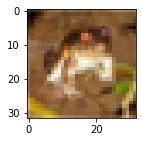

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
plt.figure(figsize=(2,2))
plt.imshow(train_images[0], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=30000).batch(128).repeat(100)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)

In [5]:
training_steps = 1000

opt = tf.optimizers.Adam(learning_rate=.0005)

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for step, (img_batch, lbl_batch) in enumerate(data):
  if step > 60000:
    break
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    xent = loss_fn(lbl_batch, logits)
  
  varis = model.trainable_variables
  grads = tape.gradient(xent, varis)
  opt.apply_gradients(zip(grads, varis))

  train_acc_metric(lbl_batch, logits)
  if not step % 1000:
    print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
    train_acc_metric.reset_states()


Loss: 2.1408934593200684 Accuracy: 0.3515625
Loss: 2.037466049194336 Accuracy: 0.33966100215911865
Loss: 1.9415867328643799 Accuracy: 0.4113612174987793
Loss: 1.965254783630371 Accuracy: 0.4697273075580597
Loss: 1.8709218502044678 Accuracy: 0.5134526491165161
Loss: 1.883116364479065 Accuracy: 0.5446272492408752


KeyboardInterrupt: ignored